## 1 read dataframe

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
from IPython.display import display
from collections import Counter

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

#read csv
#df=pd.read_csv('new_grep_merge2.csv').drop('Unnamed: 0',axis=1).dropna().reset_index(drop=True)


In [7]:
df= pd.read_csv('new_grep_merge2.csv').drop('Unnamed: 0',axis=1).dropna().reset_index(drop=True)

In [8]:

df.head()

,chromosome,mutation_id,reference,allele,allele_freq,ensemble_gene_id,ensemble_transcript_id,pdb_id,chain_id,amino_acid_position,SIFT_consequence,SIFT_score,PPH_consequence,PPH_score,bind_site,GERP_score,mutation_score_change,distance,distance_normed,mutated_amino_acid,wildtype_amino_acid,mutated_polarity_index,wildtype_polarity_index,polarity_change,polarity_change_abs,mutated_volume,wildtype_volume,volumn_change_index
0,chr1,155206158,G,A,0.000025,ENSG00000177628,ENST00000327247,2v3d,B,130,deleterious,0.02,possibly_damaging,0.661,False,3.67,0.0,11.834154,0.201564,CYS,ILE,0.5,0.0,0.5,0.5,86.0,124.0,-0.527932
1,chr1,155207946,G,T,0.000008,ENSG00000177628,ENST00000327247,2v3d,B,250,deleterious,0.00,possibly_damaging,0.790,False,2.72,0.0,12.417176,0.214377,ASN,GLY,0.5,0.0,0.5,0.5,96.0,48.0,1.000000
2,chr1,155208387,C,T,0.000017,ENSG00000177628,ENST00000327247,2v3d,B,327,tolerated,0.29,benign,0.011,False,3.55,0.0,18.040487,0.337957,HIS,THR,0.5,0.5,0.0,0.0,118.0,93.0,0.343484
3,chr1,155210432,G,A,0.000025,ENSG00000177628,ENST00000327247,2v3d,B,460,tolerated,0.36,benign,0.028,False,2.69,0.0,26.783877,0.530104,LEU,VAL,0.0,0.0,0.0,0.0,124.0,105.0,0.239951
4,chr1,155210432,G,C,0.000008,ENSG00000177628,ENST00000327247,2v3d,B,460,tolerated,0.09,possibly_damaging,0.708,False,2.69,0.0,26.783877,0.530104,TRP,VAL,0.5,0.0,0.5,0.5,163.0,105.0,0.634483


In [9]:
df.shape

(8997, 28)

## 2 create mutation_change_class feature

In [10]:
#create mutation_change_class feature
mutation_change_class=[]
for msc in df['mutation_score_change'].values:
    if msc >0:
        mutation_change_class.append('pos')
    else:
        mutation_change_class.append('zero_and_neg')
   
df['mutation_change_class']=mutation_change_class

display(df.head())
print df.shape
print Counter(mutation_change_class)

,chromosome,mutation_id,reference,allele,allele_freq,ensemble_gene_id,ensemble_transcript_id,pdb_id,chain_id,amino_acid_position,SIFT_consequence,SIFT_score,PPH_consequence,PPH_score,bind_site,GERP_score,mutation_score_change,distance,distance_normed,mutated_amino_acid,wildtype_amino_acid,mutated_polarity_index,wildtype_polarity_index,polarity_change,polarity_change_abs,mutated_volume,wildtype_volume,volumn_change_index,mutation_change_class
0,chr1,155206158,G,A,0.000025,ENSG00000177628,ENST00000327247,2v3d,B,130,deleterious,0.02,possibly_damaging,0.661,False,3.67,0.0,11.834154,0.201564,CYS,ILE,0.5,0.0,0.5,0.5,86.0,124.0,-0.527932,zero_and_neg
1,chr1,155207946,G,T,0.000008,ENSG00000177628,ENST00000327247,2v3d,B,250,deleterious,0.00,possibly_damaging,0.790,False,2.72,0.0,12.417176,0.214377,ASN,GLY,0.5,0.0,0.5,0.5,96.0,48.0,1.000000,zero_and_neg
2,chr1,155208387,C,T,0.000017,ENSG00000177628,ENST00000327247,2v3d,B,327,tolerated,0.29,benign,0.011,False,3.55,0.0,18.040487,0.337957,HIS,THR,0.5,0.5,0.0,0.0,118.0,93.0,0.343484,zero_and_neg
3,chr1,155210432,G,A,0.000025,ENSG00000177628,ENST00000327247,2v3d,B,460,tolerated,0.36,benign,0.028,False,2.69,0.0,26.783877,0.530104,LEU,VAL,0.0,0.0,0.0,0.0,124.0,105.0,0.239951,zero_and_neg
4,chr1,155210432,G,C,0.000008,ENSG00000177628,ENST00000327247,2v3d,B,460,tolerated,0.09,possibly_damaging,0.708,False,2.69,0.0,26.783877,0.530104,TRP,VAL,0.5,0.0,0.5,0.5,163.0,105.0,0.634483,zero_and_neg


(8997, 29)
Counter({'zero_and_neg': 8443, 'pos': 554})


## 3 drop unrelated columns
+ set mutation_change_class feature as the prediction target

In [12]:
features=df[['SIFT_score','PPH_score', 'bind_site', \
             'GERP_score','distance', 'distance_normed', \
             'volumn_change_index']]
display(features.head())
print features.shape
target=df['mutation_change_class']

,SIFT_score,PPH_score,bind_site,GERP_score,distance,distance_normed,volumn_change_index
0,0.02,0.661,False,3.67,11.834154,0.201564,-0.527932
1,0.00,0.790,False,2.72,12.417176,0.214377,1.000000
2,0.29,0.011,False,3.55,18.040487,0.337957,0.343484
3,0.36,0.028,False,2.69,26.783877,0.530104,0.239951
4,0.09,0.708,False,2.69,26.783877,0.530104,0.634483


(8997, 7)


## 4.1 encode the target to 0,1

In [13]:
target_encoded=[]
for mcc in target:
    if mcc=='pos':
        target_encoded.append(1)
    else:
        target_encoded.append(0)
print '0:zero_and_neg   1:pos'
print Counter(target_encoded)

0:zero_and_neg   1:pos
Counter({0: 8443, 1: 554})


In [14]:
bind_site_class=[]
for value in features['bind_site']:
    if value==True:
        bind_site_class.append('T')
    else:
        bind_site_class.append('F')
print 'bind site:',Counter(features['bind_site'])        
features_encoded=features

bind site: Counter({False: 7801, True: 1196})


In [15]:
features_encoded.head()

,SIFT_score,PPH_score,bind_site,GERP_score,distance,distance_normed,volumn_change_index
0,0.02,0.661,False,3.67,11.834154,0.201564,-0.527932
1,0.00,0.790,False,2.72,12.417176,0.214377,1.000000
2,0.29,0.011,False,3.55,18.040487,0.337957,0.343484
3,0.36,0.028,False,2.69,26.783877,0.530104,0.239951
4,0.09,0.708,False,2.69,26.783877,0.530104,0.634483


In [16]:
features_encoded.loc[:,'bind_site']=bind_site_class

C:\Anaconda2\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [17]:
features_encoded.head()

,SIFT_score,PPH_score,bind_site,GERP_score,distance,distance_normed,volumn_change_index
0,0.02,0.661,F,3.67,11.834154,0.201564,-0.527932
1,0.00,0.790,F,2.72,12.417176,0.214377,1.000000
2,0.29,0.011,F,3.55,18.040487,0.337957,0.343484
3,0.36,0.028,F,2.69,26.783877,0.530104,0.239951
4,0.09,0.708,F,2.69,26.783877,0.530104,0.634483


In [18]:
features_encoded=pd.get_dummies(features_encoded)

In [19]:
features_encoded.head()

,SIFT_score,PPH_score,GERP_score,distance,distance_normed,volumn_change_index,bind_site_F,bind_site_T
0,0.02,0.661,3.67,11.834154,0.201564,-0.527932,1,0
1,0.00,0.790,2.72,12.417176,0.214377,1.000000,1,0
2,0.29,0.011,3.55,18.040487,0.337957,0.343484,1,0
3,0.36,0.028,2.69,26.783877,0.530104,0.239951,1,0
4,0.09,0.708,2.69,26.783877,0.530104,0.634483,1,0


## 4.2 encode bind_site to bind_site_T and bind_site_F

In [26]:

features_encoded.loc[:,'bind_site']=bind_site_class
features_encoded=pd.get_dummies(features_encoded)  #encode
display(features_encoded.head())
print 'features_encoded shape:',features_encoded.shape

bind site: Counter({False: 7801, True: 1196})


,SIFT_score,PPH_score,GERP_score,distance,distance_normed,volumn_change_index,bind_site_F,bind_site_T
0,0.02,0.661,3.67,11.834154,0.201564,-0.527932,1,0
1,0.00,0.790,2.72,12.417176,0.214377,1.000000,1,0
2,0.29,0.011,3.55,18.040487,0.337957,0.343484,1,0
3,0.36,0.028,2.69,26.783877,0.530104,0.239951,1,0
4,0.09,0.708,2.69,26.783877,0.530104,0.634483,1,0


features_encoded shape: (8997, 8)


## 5 split the features and target into 70%  30% randomly

In [12]:
from sklearn.model_selection import train_test_split
features70, features30, target70, target30 = train_test_split(features_encoded, target_encoded,\
                                                    test_size = 0.3, random_state = 1000)

print 'original features size:',features_encoded.shape
print 'original target size:',Counter(target_encoded)
print
print '70% sample features size:',features70.shape
print '70% sample target size:',Counter(target70)
print 
print '30% sample features size:',features30.shape
print '30% sample target size:',Counter(target30)

original features size: (8997, 8)
original target size: Counter({0: 8443, 1: 554})

70% sample features size: (6297, 8)
70% sample target size: Counter({0: 5910, 1: 387})

30% sample features size: (2700, 8)
30% sample target size: Counter({0: 2533, 1: 167})


## 6 train the random_forest model
+ use 70% sample to train the model
+ do the insample prediction

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer,auc,accuracy_score,fbeta_score,recall_score,precision_score,roc_auc_score


scorer = make_scorer(fbeta_score,beta=1.2)
learner=RandomForestClassifier(random_state=10000)
    
# Apply  GridSearchCV to do the cross validation and find optimal parameters
parameters = {'n_estimators':[2000],\
              'max_features':['log2','auto'],\
              'oob_score':[True],\
              'min_samples_leaf':[30,50,80]}
grid_obj =  GridSearchCV(learner,parameters,cv=3,scoring=scorer)
grid_fit = grid_obj.fit(features70,target70)  # Fit the data
best_clf = grid_fit.best_estimator_           # Get the best estimator
best_clf.fit(features70,target70)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='log2', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=30,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=2000, n_jobs=1, oob_score=True,
            random_state=10000, verbose=0, warm_start=False)

In [35]:
#grid search cv result
cv_results=pd.DataFrame(grid_obj.cv_results_)
display(cv_results)

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_max_features,param_min_samples_leaf,param_n_estimators,param_oob_score,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,12.630734,1.377528,0.410206,0.482815,log2,30,2000,True,"{u'max_features': u'log2', u'n_estimators': 20...",1,0.444040,0.496720,0.394231,0.498909,0.392346,0.452815,0.331129,0.028440,0.023937,0.021232
1,12.121181,1.320577,0.394638,0.447082,log2,50,2000,True,"{u'max_features': u'log2', u'n_estimators': 20...",2,0.424331,0.454376,0.370364,0.452465,0.389217,0.434404,0.143329,0.050978,0.022363,0.008998
2,11.322214,1.316010,0.364378,0.399056,log2,80,2000,True,"{u'max_features': u'log2', u'n_estimators': 20...",4,0.403706,0.400470,0.298654,0.364006,0.390775,0.432692,0.308930,0.051520,0.046773,0.028059
3,9.992061,1.302752,0.382942,0.449986,auto,30,2000,True,"{u'max_features': u'auto', u'n_estimators': 20...",3,0.433761,0.453711,0.354710,0.451742,0.360354,0.444507,0.101030,0.011577,0.036008,0.003957
4,9.537181,1.290169,0.350261,0.420611,auto,50,2000,True,"{u'max_features': u'auto', u'n_estimators': 20...",5,0.385114,0.430423,0.305316,0.407079,0.360354,0.424331,0.059470,0.007522,0.033350,0.009887
5,9.642462,1.355329,0.311744,0.350750,auto,80,2000,True,"{u'max_features': u'auto', u'n_estimators': 20...",6,0.374956,0.351933,0.235305,0.319805,0.324970,0.380511,0.267563,0.036044,0.057774,0.024797


In [27]:
#insample prediction
from sklearn.metrics import auc,accuracy_score,fbeta_score,recall_score,precision_score,roc_auc_score
import matplotlib.pyplot as plt
pred70=best_clf.predict(features70)

print 'insample prediction score:'
print '    accuracy_score:',accuracy_score(pred70,target70)
print '    fbeta_score:',fbeta_score(pred70,target70,beta=1)
print '    recall_score:',recall_score(pred70,target70)
print '    precision_score:',precision_score(pred70,target70)
print '    roc_auc_score:',roc_auc_score(pred70,target70)

insample prediction score:
    accuracy_score: 0.953946323646
    fbeta_score: 0.513422818792
    recall_score: 0.732057416268
    precision_score: 0.395348837209
    roc_auc_score: 0.8468105741


## 7 predict 30% part features created in step 6
+ with original distribution unchanged

30% part skewed feature prediction score:
    accuracy_score: 0.948148148148
    fbeta_score: 0.430894308943
    recall_score: 0.670886075949
    precision_score: 0.317365269461
    roc_auc_score: 0.813695613328

confusion_metrix:

,predicted neg_and_zero0,predicted pos1
actual neg_and_zero0,2507,114
actual pos1,26,53


 None

Actual target30 size: Counter({0: 2533, 1: 167})
Prediction pred30 size: Counter({0: 2621, 1: 79})


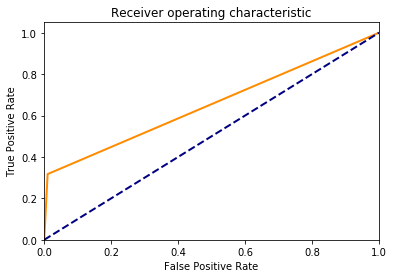

In [28]:
from sklearn.metrics import auc,roc_curve,accuracy_score,fbeta_score,recall_score,precision_score,roc_auc_score,confusion_matrix
import matplotlib.pyplot as plt

pred30=best_clf.predict(features30)

print '30% part skewed feature prediction score:'
print '    accuracy_score:',accuracy_score(pred30,target30)
print '    fbeta_score:',fbeta_score(pred30,target30,beta=1)
print '    recall_score:',recall_score(pred30,target30)
print '    precision_score:',precision_score(pred30,target30)
print '    roc_auc_score:',roc_auc_score(pred30,target30)


print
print 'confusion_metrix:',display(pd.DataFrame(confusion_matrix(pred30,target30),
                                                  index=['actual neg_and_zero0','actual pos1'],
                                                  columns=['predicted neg_and_zero0','predicted pos1']))

print 
print 'Actual target30 size:',Counter(target30)
print 'Prediction pred30 size:',Counter(pred30)


#roc plot

fpr, tpr, thresholds = roc_curve(target30, pred30)
plt.figure()
plt.plot(fpr, tpr,lw=2, color='darkorange')
plt.plot([0, 1], [0, 1], lw=2,color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()   

## 9pred with proba

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer,auc,accuracy_score,fbeta_score,recall_score,precision_score,roc_auc_score


scorer = make_scorer(fbeta_score,beta=1.2)
learner1=RandomForestClassifier(random_state=10000,n_estimators=2000,
                              max_features='log2',oob_score=True)

learner_fit1={}
pred_proba1={}
fpr1={}
tpr1={}
roc_auc1={}
for one_feature in features70.columns:
    #Fit the data using one feature
    learner_fit1[one_feature]= learner1.fit(features70[one_feature].values.reshape(-1,1),target70)  

    # Pred with prob1
    pred_proba1[one_feature]=learner_fit1[one_feature].predict_proba(features30[one_feature].values.reshape(-1,1))[:, 1]
    # Compute fp1,tp1,auc1
    fpr1[one_feature], tpr1[one_feature], _ = roc_curve(target30, pred_proba1[one_feature])
    roc_auc1[one_feature] = auc(fpr1[one_feature], tpr1[one_feature])

In [30]:
# Pred proba with all features using model trained in step 6  
pred_proba=best_clf.predict_proba(features30)[:, 1]
# Compute fp,tp,auc
fpr, tpr, _ = roc_curve(target30, pred_proba)
roc_auc = auc(fpr, tpr)

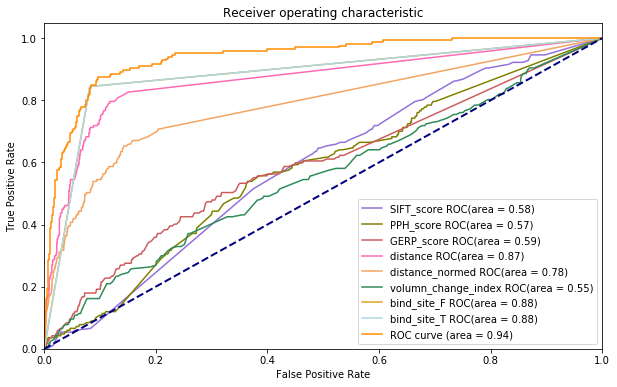

In [31]:
lw = 2

my_color=['mediumpurple','olive','indianred','hotpink','sandybrown','seagreen','goldenrod','lightblue','cadetblue']
color_index=0
plt.figure(figsize=(10, 6))
#ROC with one feature
for one_feature in features70.columns:
    plt.plot(fpr1[one_feature], tpr1[one_feature],
             label=one_feature+' ROC(area = {0:0.2f})'.format(roc_auc1[one_feature]),
             color=my_color[color_index])
    color_index=color_index+1
#ROC with all features
plt.plot(fpr, tpr,
         label='ROC curve (area = {0:0.2f})'
               ''.format(roc_auc),color='darkorange')    
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

## 10 feature importance

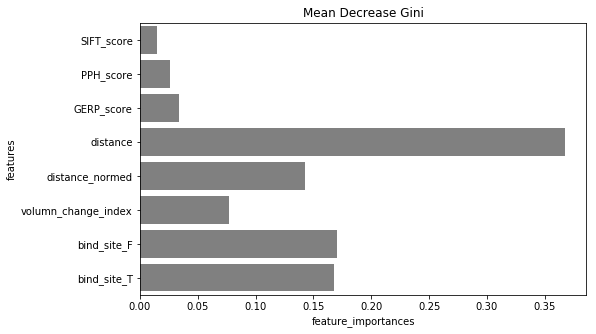

In [32]:
##feature importance
feature_columns=list(features70.columns)
feature_importances=best_clf.feature_importances_
df_importance=pd.DataFrame(data={'features':feature_columns,
                   'feature_importances':feature_importances})
#plot
plt.figure(figsize=(8,5))
sns.barplot(x="feature_importances", y="features", data=df_importance,
           color='grey')
plt.title('Mean Decrease Gini')
plt.show()